# Video Game Sales  12/4/2019
<b>This data set contains sales data from more than 55,792 games and some game canceled</b><br><br>
<b>I corrected 108 games that were dated 1973 and were wrong and I copied the one in the Global_Sales column and put it in the Total_Shipped column .</b><br>
It was generated by a scrape of <b>vgchartz.com</b>.

Fields include
<ol>
<li>Rank - Ranking of overall sales
<li>Name - The games name
<li>Genre - Genre of the game
<li>ESRB_Rating - The Entertainment Software Rating Board
<li>Platform - Platform of the games release (i.e. PC,PS4,NS etc.)
<li>Publisher - Publisher of the game
<li>NA_Sales - Sales in North America (in millions)
<li>EU_Sales - Sales in Europe (in millions)
<li>JP_Sales - Sales in Japan (in millions)
<li>Other_Sales - Sales in the rest of the world (in millions)
<il>Global_Sales - Total worldwide sales.</il>
<li>Year - Year of the game's release
</ol>

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
games = pd.read_excel('vgsales_F.xlsx')
print(games.shape)
games.head()

(55792, 18)


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


In [3]:
games.isnull().sum()


Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       32169
Platform              0
Publisher             0
Developer            17
VGChartz_Score    55792
Critic_Score      49256
User_Score        55457
Total_Shipped     34549
Global_Sales      36377
NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270
Year                993
dtype: int64

In [4]:
games.dropna(axis='rows', subset=['Year'], inplace=True)
games.Year = games.Year.astype(np.int64)


games.dropna(axis='rows', subset=['Year'], inplace=True)
## To Deletes the year row that has NaN

In [5]:
print(games.shape)


(54799, 18)


In [6]:
multiple_platform_title = games.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 1) else None})
multiple_platform_title = multiple_platform_title
multiple_platform_title.Name = multiple_platform_title.Name
multiple_platform_title.columns = ['Platform_count']
multiple_platform_title.sort_values(by='Platform_count', ascending=False)

,Platform_count
Name,
Plants vs. Zombies,20.0
Monopoly,15.0
Double Dragon,14.0
Elite,12.0
Space Invaders,12.0
...,...
vib-ribbon,NaN
xFart,NaN
yOm,NaN


In [7]:
multiple_platform_title = games.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 1) else None})
multiple_platform_title = multiple_platform_title.dropna()
multiple_platform_title.Name = multiple_platform_title.Name.astype(np.int64)
multiple_platform_title.columns = ['Platform_count']
multiple_platform_title.sort_values(by='Platform_count', ascending=False)

,Platform_count
Name,
Plants vs. Zombies,20
Monopoly,15
Double Dragon,14
Elite,12
Space Invaders,12
...,...
Kentucky Route Zero,2
Kenka Bancho: Badass Rumble,2
Ken to Mahou to Gakuen Mono. Final: Shinnyusei wa Ohimesama,2


##  

Text(0, 0.5, 'Platform')

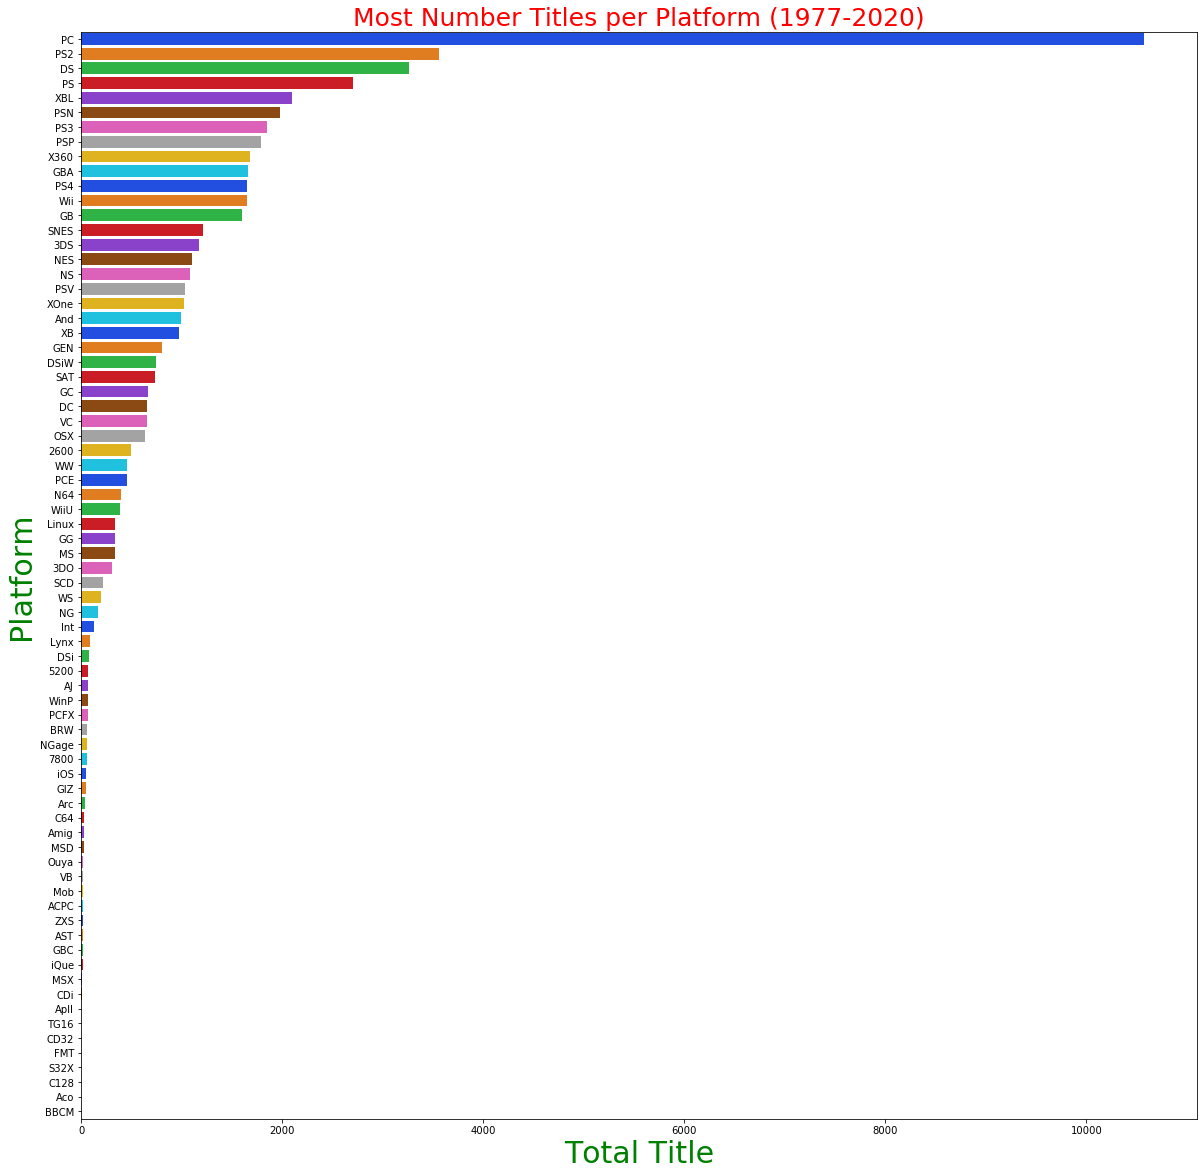

In [8]:
platform_title = games.Platform.value_counts()

plt.subplots(figsize=(20,20))
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
ax = sns.barplot(x=platform_title , y=platform_title .index, palette='bright')
ax.set_title('Most Number Titles per Platform (1977-2020)', color='red', alpha=1, size=25)
ax.set_xlabel('Total Title', color='green', alpha=1, size=30)
ax.set_ylabel('Platform', color='green', alpha=1, size=30)

In [9]:
games_by_genre = games.groupby('Genre').agg({'Genre':len})
games_by_genre.index.name = None
games_by_genre = games_by_genre.sort_values(by='Genre',ascending=False)


In [10]:
games.shape

(54799, 18)

Text(0, 0.5, 'Total Number of Games')

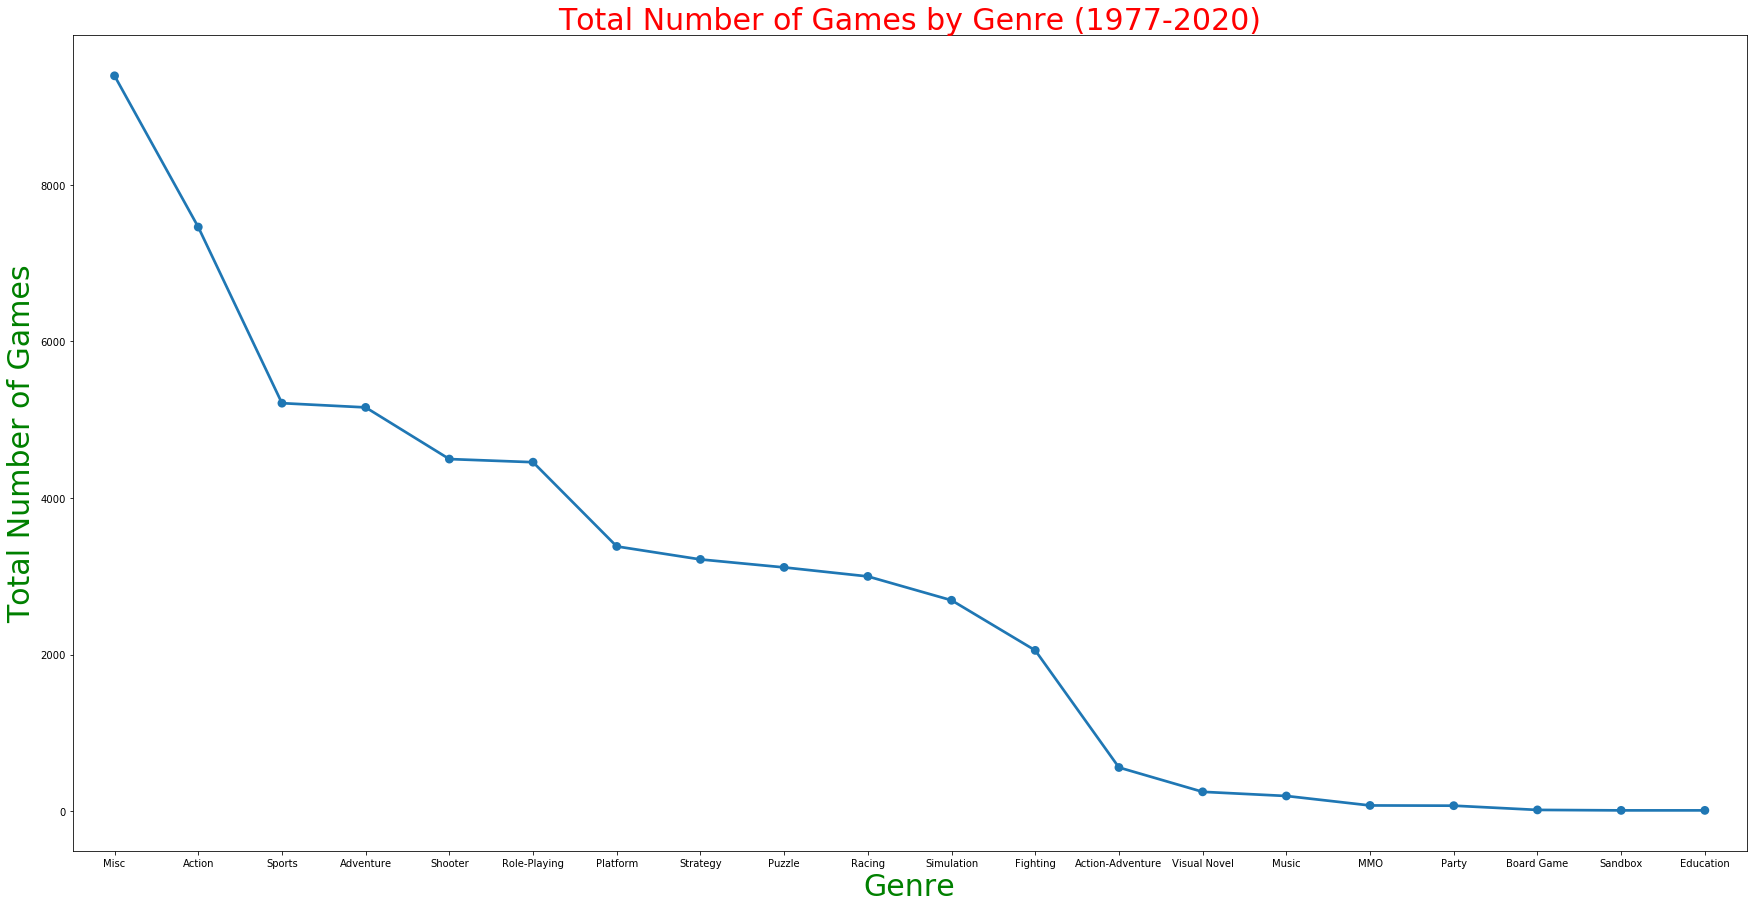

In [11]:
plt.subplots(figsize=(30,15))
ax = sns.pointplot(x=games_by_genre.index, y=games_by_genre.Genre)
ax.set_title('Total Number of Games by Genre (1977-2020)', color='red', size=30, alpha=1)
ax.set_xlabel('Genre', color='green', size=30, alpha=1)
ax.set_ylabel('Total Number of Games', color='green', size=30, alpha=1)

Text(0, 0.5, 'Global Sales')

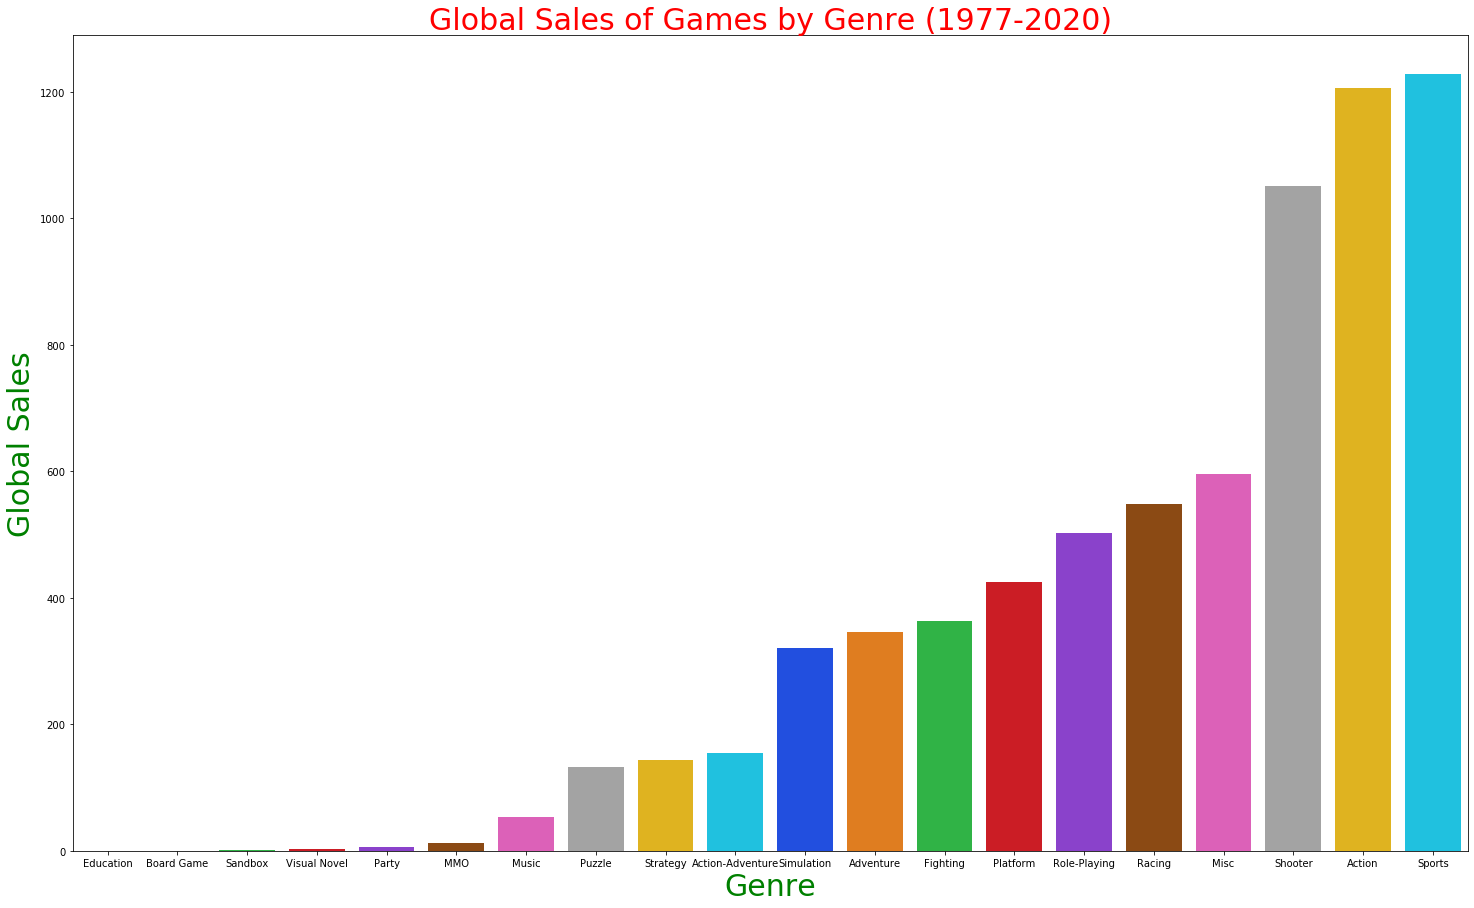

In [12]:
# Total sales based on Genre
global_sales_by_genre = games.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(25,15))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Global_Sales, palette='bright')
ax.set_title('Global Sales of Games by Genre (1977-2020)', color='red', size=30, alpha=1)
ax.set_xlabel('Genre', color='green', size=30, alpha=1)
ax.set_ylabel('Global Sales', color='green', size=30, alpha=1)

Text(0, 0.5, 'Total Shipped')

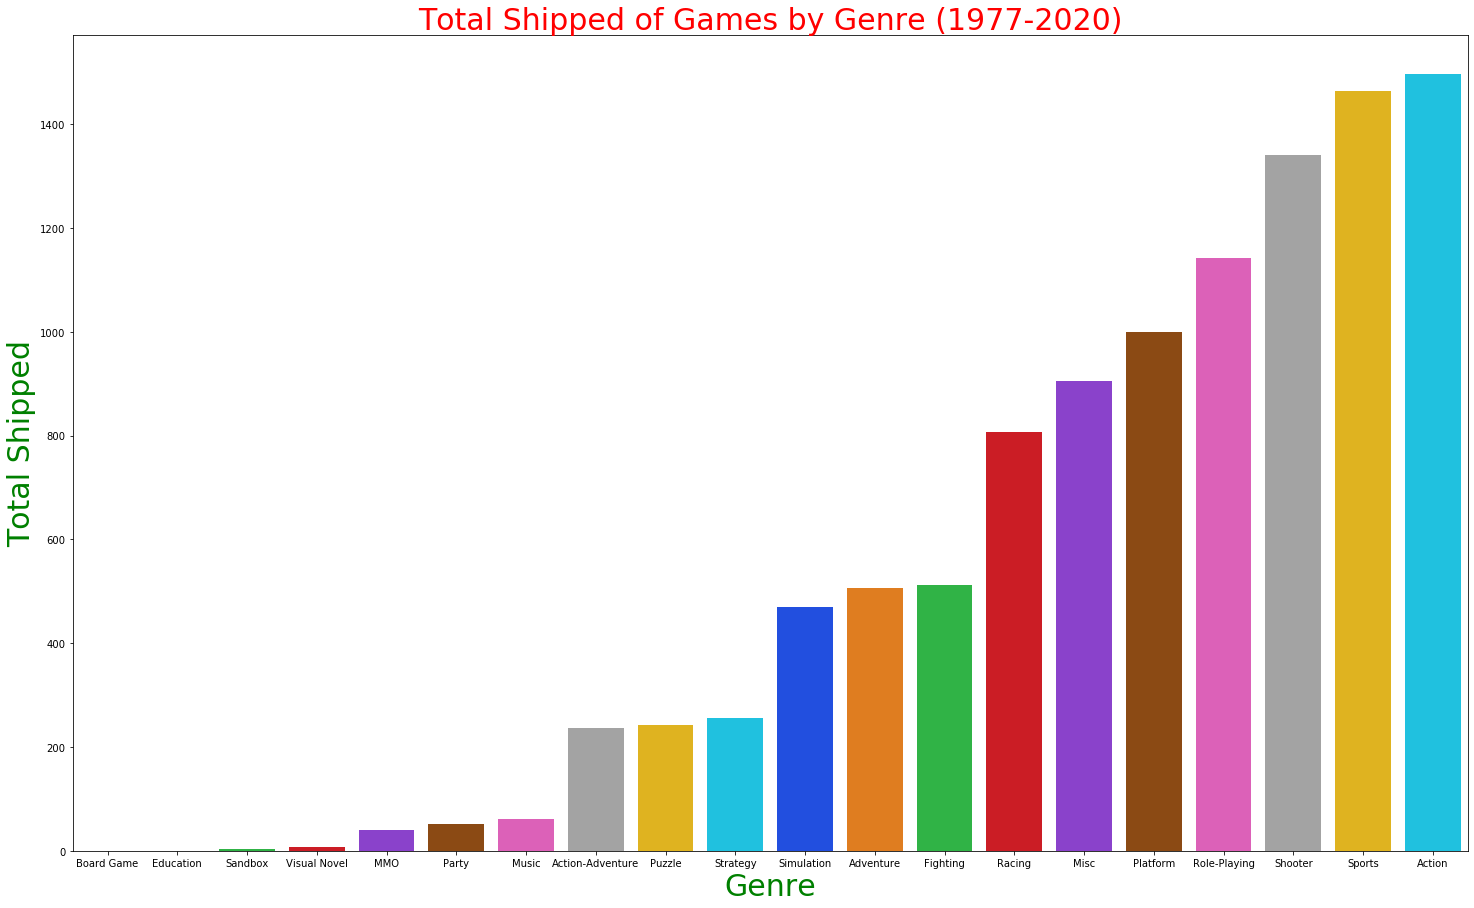

In [13]:
# Total sales based on Genre
global_sales_by_genre = games.groupby('Genre').agg({'Total_Shipped':np.sum}).sort_values('Total_Shipped')
plt.subplots(figsize=(25,15))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Total_Shipped, palette='bright', alpha=1)
ax.set_title('Total Shipped of Games by Genre (1977-2020)', color='red', size=30, alpha=1)
ax.set_xlabel('Genre', color='green', size=30, alpha=1)
ax.set_ylabel('Total Shipped', color='green', size=30, alpha=1)

## The most developed games were Misc but the best-selling games were Action, Sport & Shooter

Text(0, 0.5, 'Sales')

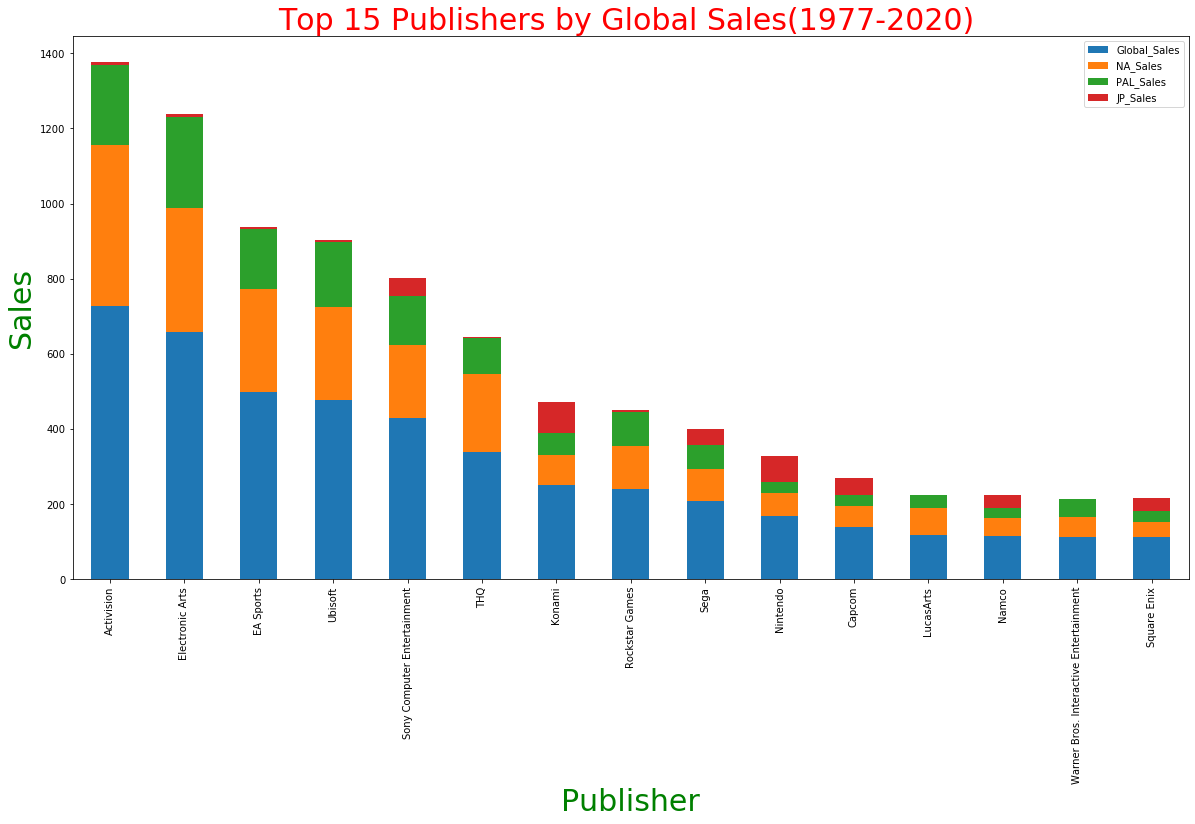

In [14]:
# Let's look at the global sales by publisher
global_sales_publisher = games.pivot_table(index=['Publisher'], values=['Global_Sales','NA_Sales','PAL_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Global_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['Global_Sales','NA_Sales','PAL_Sales','JP_Sales']]
ax = global_sales_publisher.iloc[0:15,:].plot(kind='bar', stacked=True, grid=False,figsize=(20,10))
ax.set_title('Top 15 Publishers by Global Sales(1977-2020) ', size=30, color='red', alpha=1)
ax.set_xlabel('Publisher', size=30, color='green', alpha=1)
ax.set_ylabel('Sales', size=30, color='green', alpha=1)

In [15]:
games_by_Publisher = games.loc[games.Publisher=="Activision"].sort_values(['Year'])
print(games_by_Publisher.shape)
games_by_Publisher.head()

(1519, 18)


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
4459,4460,Fishing Derby,fishing-derby,Sports,NaN,2600,Activision,Activision,NaN,NaN,NaN,0.51,0.51,0.48,0.03,NaN,0.01,1980
7243,7244,Bridge,bridge,Misc,NaN,2600,Activision,Activision,NaN,NaN,NaN,0.27,0.27,0.25,0.02,NaN,0.00,1980
6470,6471,Dragster,dragster,Racing,NaN,2600,Activision,Activision,NaN,NaN,NaN,0.32,0.32,0.30,0.02,NaN,0.00,1980
45042,45043,Skiing,skiing,Sports,NaN,2600,Activision,Activision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980
3076,3077,Boxing,boxing,Fighting,NaN,2600,Activision,Activision,NaN,NaN,NaN,0.77,0.77,0.72,0.04,NaN,0.01,1980


In [16]:
games_by_Publisher1 = games_by_Publisher.groupby('Genre').agg({'Genre':len})
games_by_Publisher1.index.name = None
games_by_Publisher1 = games_by_Publisher1.sort_values(by='Genre',ascending=False)

Text(0, 0.5, 'Total Number of Games')

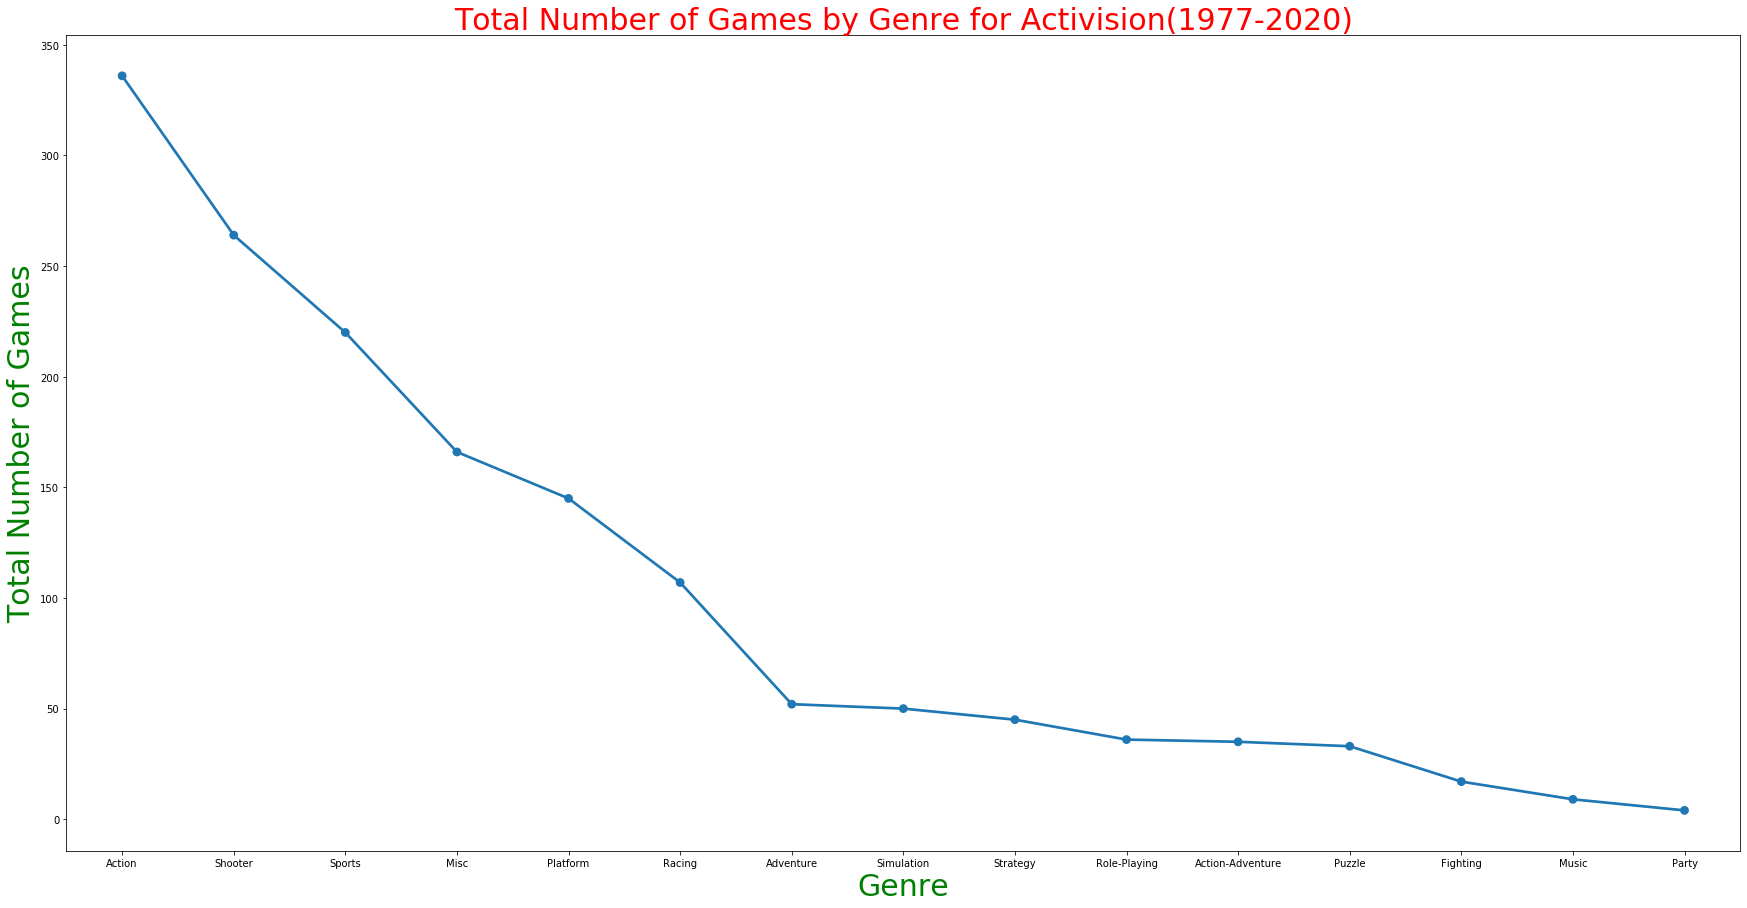

In [17]:
plt.subplots(figsize=(30,15))
ax = sns.pointplot(x=games_by_Publisher1.index, y=games_by_Publisher1.Genre)
ax.set_title('Total Number of Games by Genre for Activision(1977-2020)', color='red', size=30, alpha=1)
ax.set_xlabel('Genre', color='green', size=30, alpha=1)
ax.set_ylabel('Total Number of Games', color='green', size=30, alpha=1)

## As we see here Activision most of the development of games Action, Shooter and Sport

In [18]:
global_sales_publisher.head(n=15)

,Global_Sales,NA_Sales,PAL_Sales,JP_Sales
Publisher,,,,
Activision,727.65,428.29,214.08,7.51
Electronic Arts,658.12,328.99,243.68,8.82
EA Sports,497.62,276.25,159.21,3.36
Ubisoft,477.94,247.65,171.42,6.66
Sony Computer Entertainment,428.92,194.04,131.15,47.70
THQ,338.99,208.21,95.60,2.90
Konami,250.20,81.30,59.00,82.66
Rockstar Games,240.61,115.44,89.90,4.71
Sega,209.15,85.50,61.77,42.87


Text(0, 0.5, 'Sales')

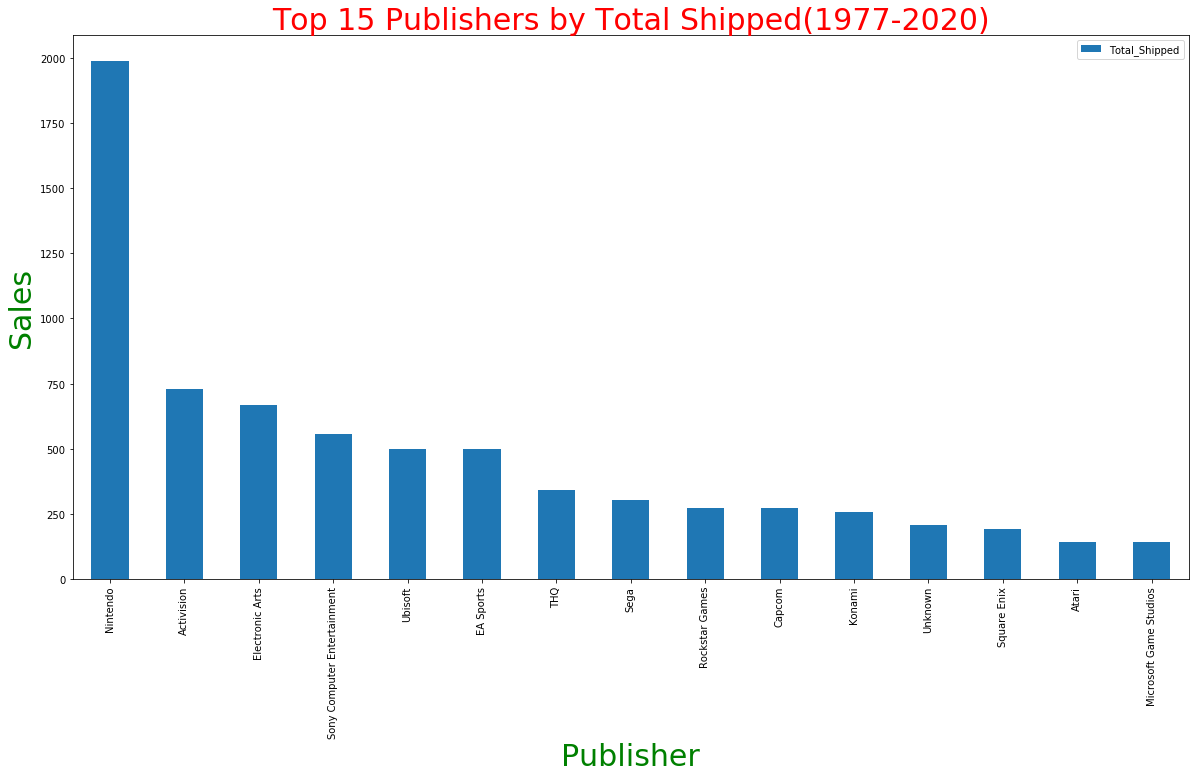

In [19]:
# Let's look at the global sales by publisher
Total_Shipped_publisher = games.pivot_table(index=['Publisher'], values=['Total_Shipped'], 
                                           aggfunc=np.sum).sort_values(['Total_Shipped'], ascending=False)
Total_Shipped_publisher = Total_Shipped_publisher[['Total_Shipped']]
ax = Total_Shipped_publisher.iloc[0:15,:].plot(kind='bar', stacked=True, grid=False,figsize=(20,10))
ax.set_title('Top 15 Publishers by Total Shipped(1977-2020)', size=30, color='Red', alpha=1)
ax.set_xlabel('Publisher', size=30, color='green', alpha=1)
ax.set_ylabel('Sales', size=30, color='green', alpha=1)

In [20]:
games_by_PublisherS = games.loc[games.Publisher=="Nintendo"].sort_values(['Year'])
print(games_by_PublisherS.shape)
games_by_PublisherS.head()

(1351, 18)


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
39568,39569,Nintengirls: College Girl & Friends,nintengirls-college-girl-amp-friends,Simulation,M,DS,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975
918,919,Mahjong,mahjong,Misc,NaN,NES,Nintendo,Nintendo,NaN,NaN,NaN,2.14,NaN,NaN,NaN,NaN,NaN,1983
41363,41364,Popeye no Eigo Asobi,popeye-no-eigo-asobi,Misc,NaN,NES,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983
1439,1440,F1 Race,f1-race,Racing,NaN,NES,Nintendo,Nintendo,NaN,NaN,NaN,1.52,NaN,NaN,NaN,NaN,NaN,1984
1551,1552,4 Nin uchi Mahjong,4-nin-uchi-mahjong,Misc,NaN,NES,Nintendo,Hudson Soft,NaN,NaN,NaN,1.45,NaN,NaN,NaN,NaN,NaN,1984


In [21]:
games_by_PublisherS1 = games_by_PublisherS.groupby('Genre').agg({'Genre':len})
games_by_PublisherS1.index.name = None
games_by_PublisherS1 = games_by_PublisherS1.sort_values(by='Genre',ascending=False)

Text(0, 0.5, 'Total Number of Games')

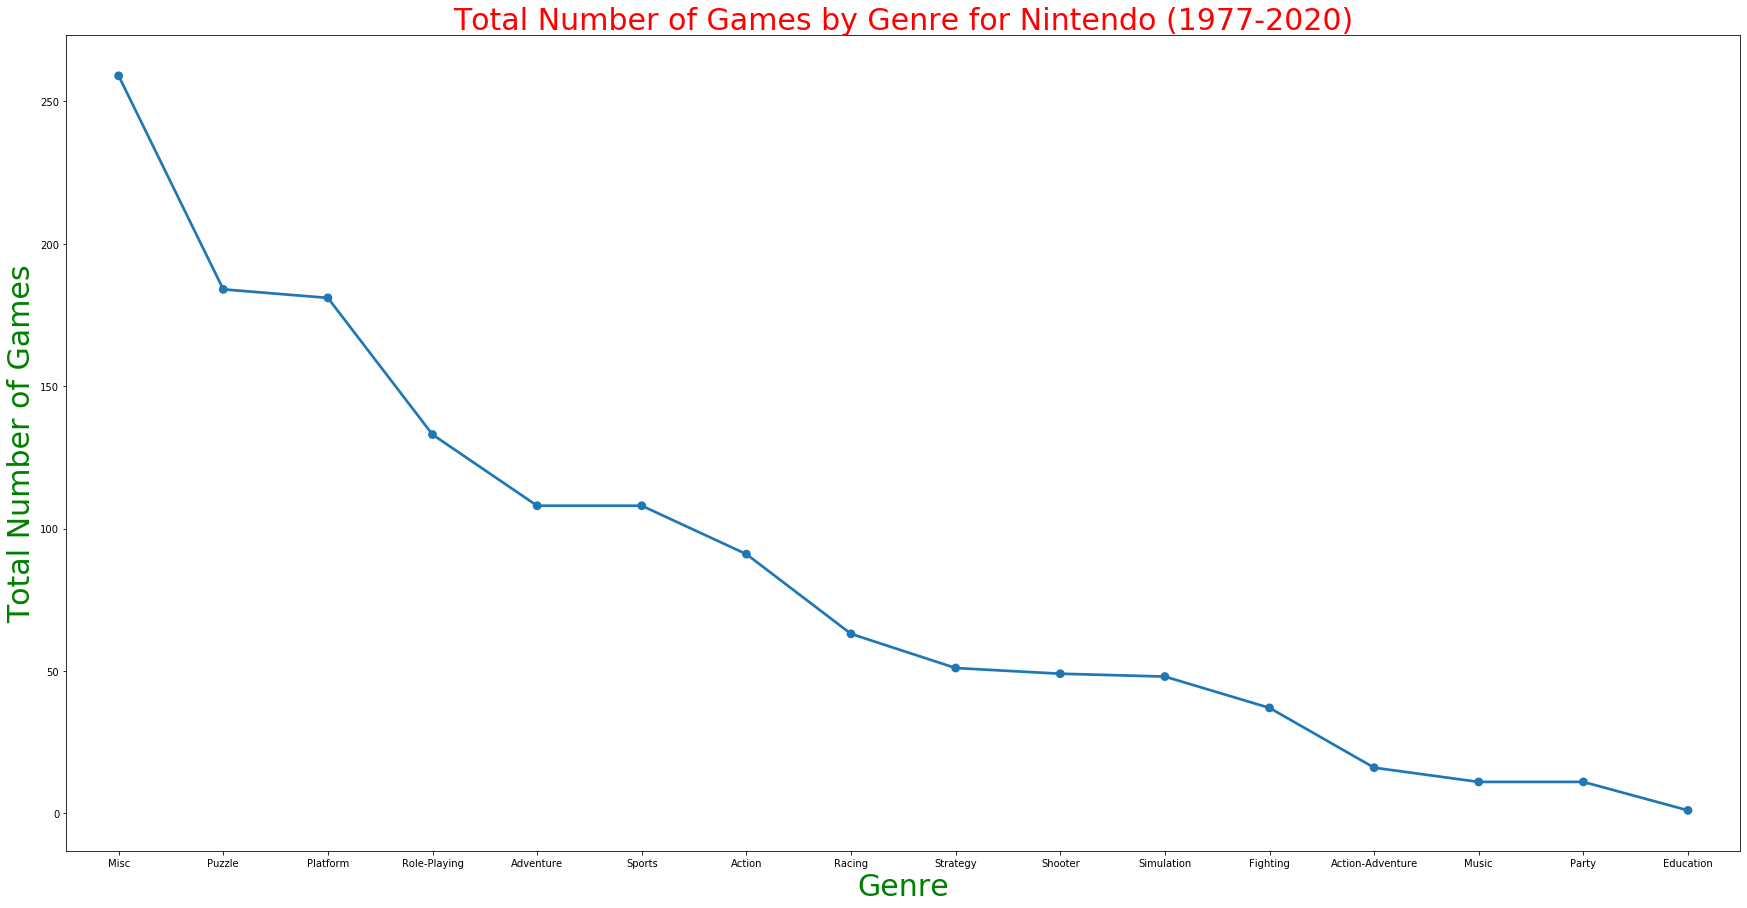

In [22]:
plt.subplots(figsize=(30,15))
ax = sns.pointplot(x=games_by_PublisherS1.index, y=games_by_PublisherS1.Genre)
ax.set_title('Total Number of Games by Genre for Nintendo (1977-2020)', color='red', size=30, alpha=1)
ax.set_xlabel('Genre', color='green', size=30, alpha=1)
ax.set_ylabel('Total Number of Games', color='green', size=30, alpha=1)

In [23]:
Total_Shipped_publisher.head(n=15)

,Total_Shipped
Publisher,
Nintendo,1988.48
Activision,730.13
Electronic Arts,668.50
Sony Computer Entertainment,555.43
Ubisoft,498.48
EA Sports,497.62
THQ,342.48
Sega,302.06
Rockstar Games,273.85


Text(0, 0.5, 'Number of Titles')

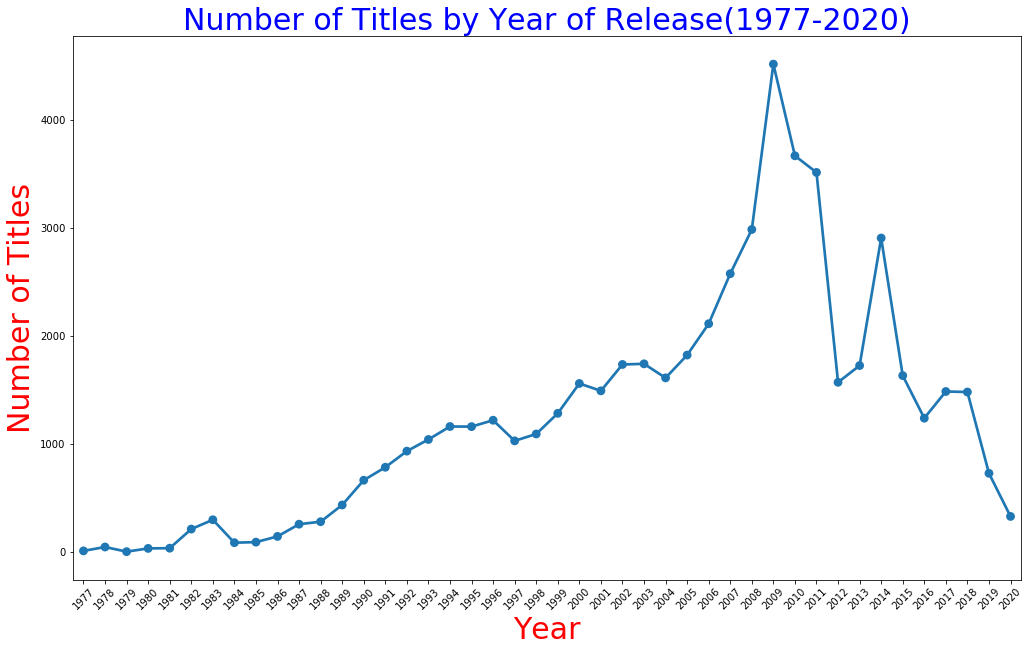

In [24]:
# Number of titles per year
titles_by_year = games.groupby(['Year']).agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
plt.subplots(figsize=(17,10))
ax = sns.pointplot(x=titles_by_year.index, y=titles_by_year.Name, alpha=1)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Number of Titles by Year of Release(1977-2020)', size=30, color='blue', alpha=1)
ax.set_xlabel('Year', size=30, color='red', alpha=1)
ax.set_ylabel('Number of Titles', size=30, color='red', alpha=1)

In [25]:
titles_by_year

,Name
Year,
1977,12.0
1978,48.0
1979,5.0
1980,35.0
1981,37.0
1982,214.0
1983,300.0
1984,88.0
1985,93.0


Text(0, 0.5, 'Number of Total Shipped')

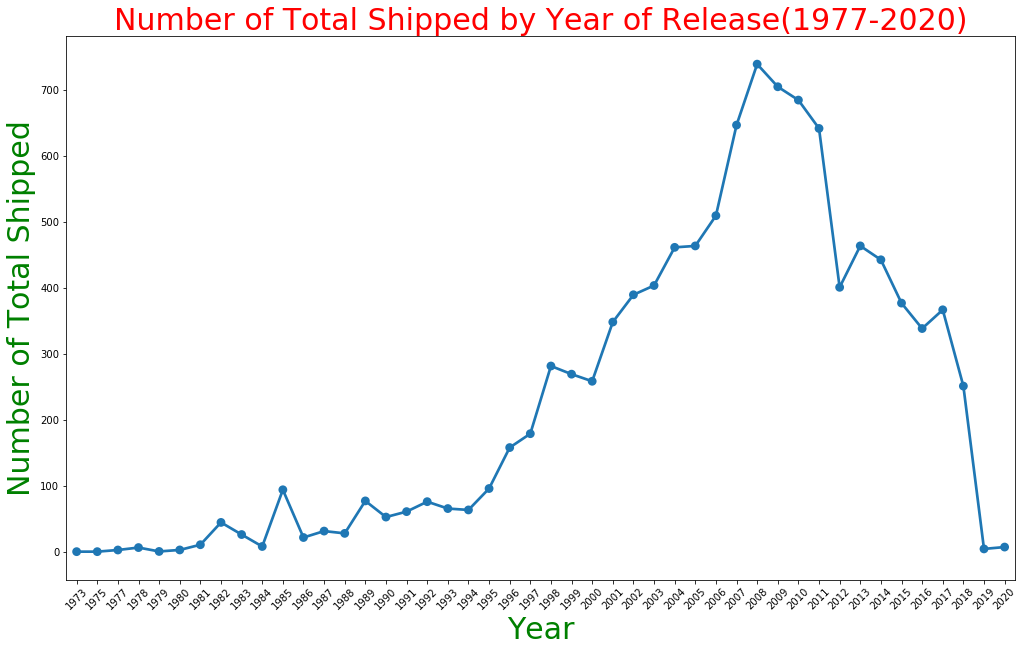

In [26]:
# Number of titles per year

titles_by_year1 = games.groupby(['Year']).agg({'Total_Shipped':np.sum})
plt.subplots(figsize=(17,10))
ax = sns.pointplot(x=titles_by_year1.index, y=titles_by_year1.Total_Shipped, alpha=1)
g = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Number of Total Shipped by Year of Release(1977-2020)', size=30, color='red', alpha=1)
ax.set_xlabel('Year', size=30, color='green', alpha=1)
ax.set_ylabel('Number of Total Shipped', size=30, color='green', alpha=1)

In [27]:
titles_by_year1

,Total_Shipped
Year,
1973,0.00
1975,0.00
1977,2.50
1978,6.19
1979,0.31
1980,2.58
1981,10.49
1982,44.29
1983,25.92


## The best sales year for games was in 2009 and was 704.25 million copies and 4516 games

In [28]:
games_2009 = games.loc[games.Year==2009].sort_values(['Year'])
print(games_2009.shape)
games_2009.head()

(4516, 18)


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009
33762,33763,Hot Shots Golf: Open Tee 2,hot-shots-golf-open-tee-2,Sports,E,PSN,Sony Computer Entertainment,Clap Hanz,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
33781,33782,Hotel Danger,hotel-danger,Puzzle,NaN,XBL,Microsoft,North West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
33782,33783,Hotel Giant 2,hotel-giant-2,Strategy,NaN,DS,Unknown,Creative Patterns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009
33842,33843,Hula Wii: Motto Jouzu no Fura o Odorou!!,hula-wii-motto-jouzu-no-fura-o-odorou,Sports,NaN,Wii,Milestone,MileStone Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009


Text(0, 0.5, 'Platform')

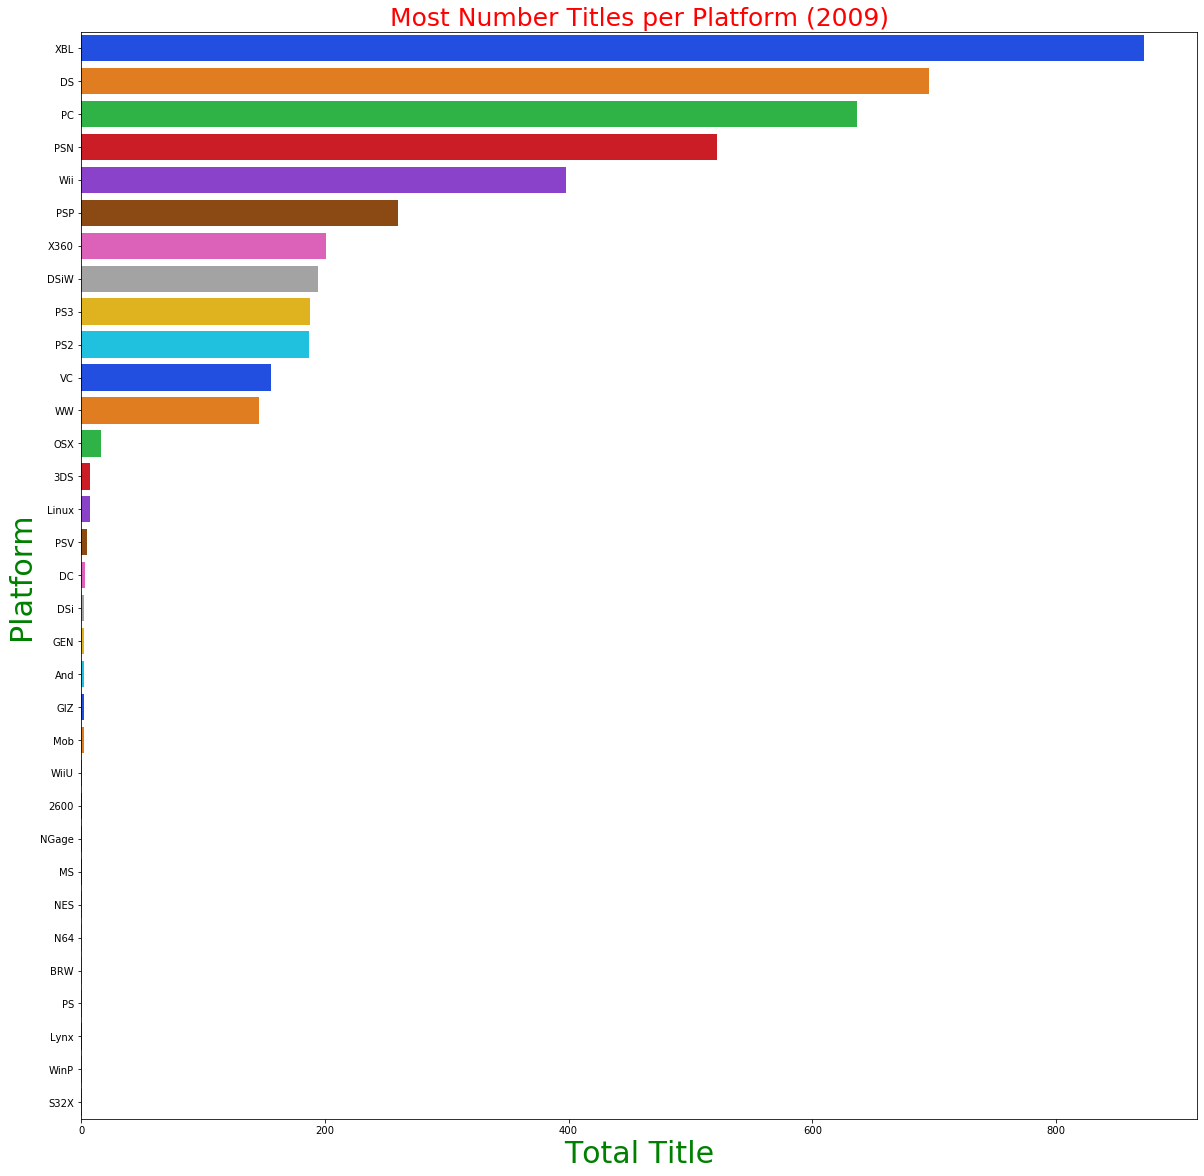

In [29]:
platform_title = games_2009.Platform.value_counts()

plt.subplots(figsize=(20,20))
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
ax = sns.barplot(x=platform_title , y=platform_title .index, palette='bright')
ax.set_title('Most Number Titles per Platform (2009)', color='red', alpha=1, size=25)
ax.set_xlabel('Total Title', color='green', alpha=1, size=30)
ax.set_ylabel('Platform', color='green', alpha=1, size=30)

In [30]:
games_by_genre_2009 = games_2009.groupby('Genre').agg({'Genre':len})
games_by_genre_2009.index.name = None
games_by_genre_2009 = games_by_genre_2009.sort_values(by='Genre',ascending=False)


Text(0, 0.5, 'Total Number of Games')

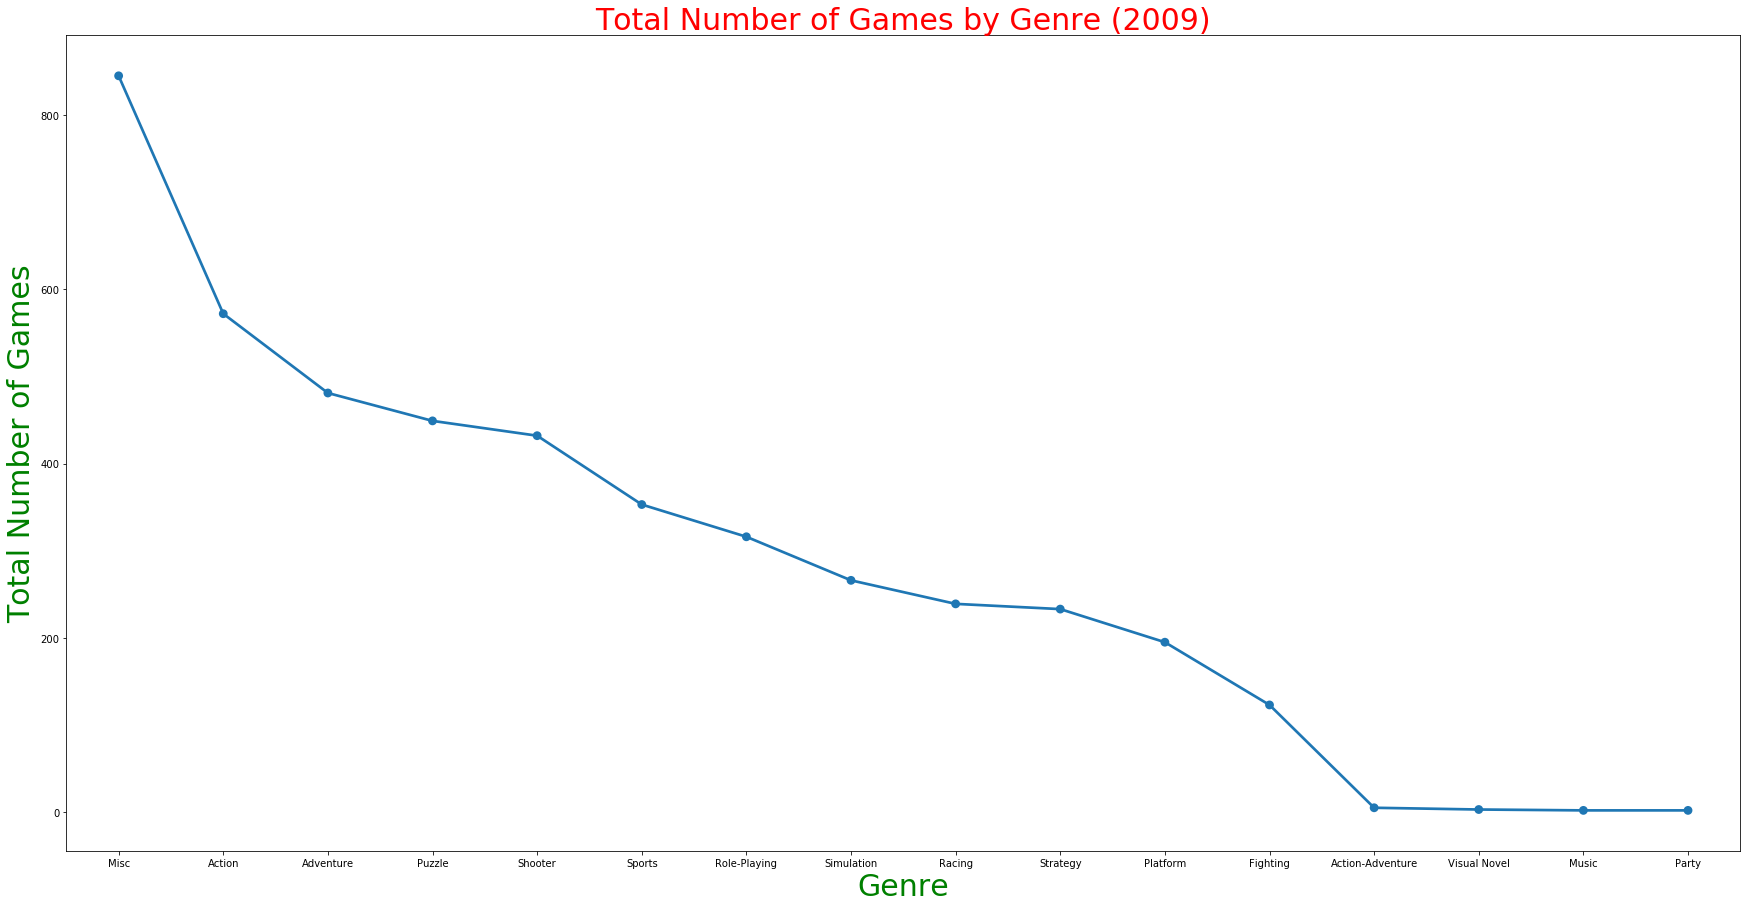

In [31]:
plt.subplots(figsize=(30,15))
ax = sns.pointplot(x=games_by_genre_2009.index, y=games_by_genre_2009.Genre)
ax.set_title('Total Number of Games by Genre (2009)', color='red', size=30, alpha=1)
ax.set_xlabel('Genre', color='green', size=30, alpha=1)
ax.set_ylabel('Total Number of Games', color='green', size=30, alpha=1)

Text(0, 0.5, 'Global Sales')

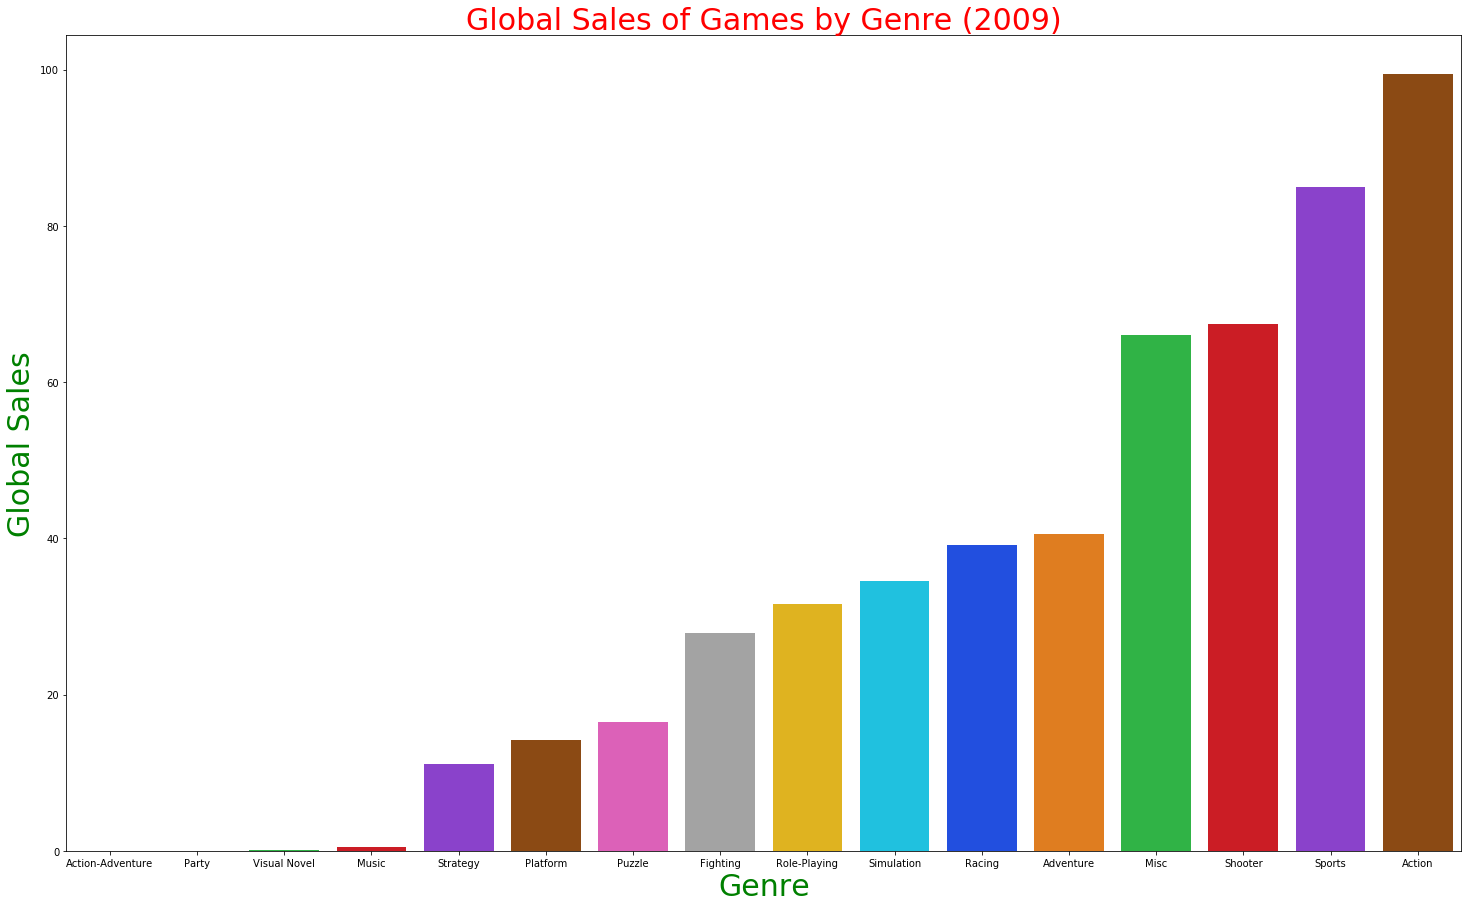

In [32]:
# Total sales based on Genre
global_sales_by_genre = games_2009.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(25,15))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Global_Sales, palette='bright')
ax.set_title('Global Sales of Games by Genre (2009)', color='red', size=30, alpha=1)
ax.set_xlabel('Genre', color='green', size=30, alpha=1)
ax.set_ylabel('Global Sales', color='green', size=30, alpha=1)

Text(0, 0.5, 'Total Shipped')

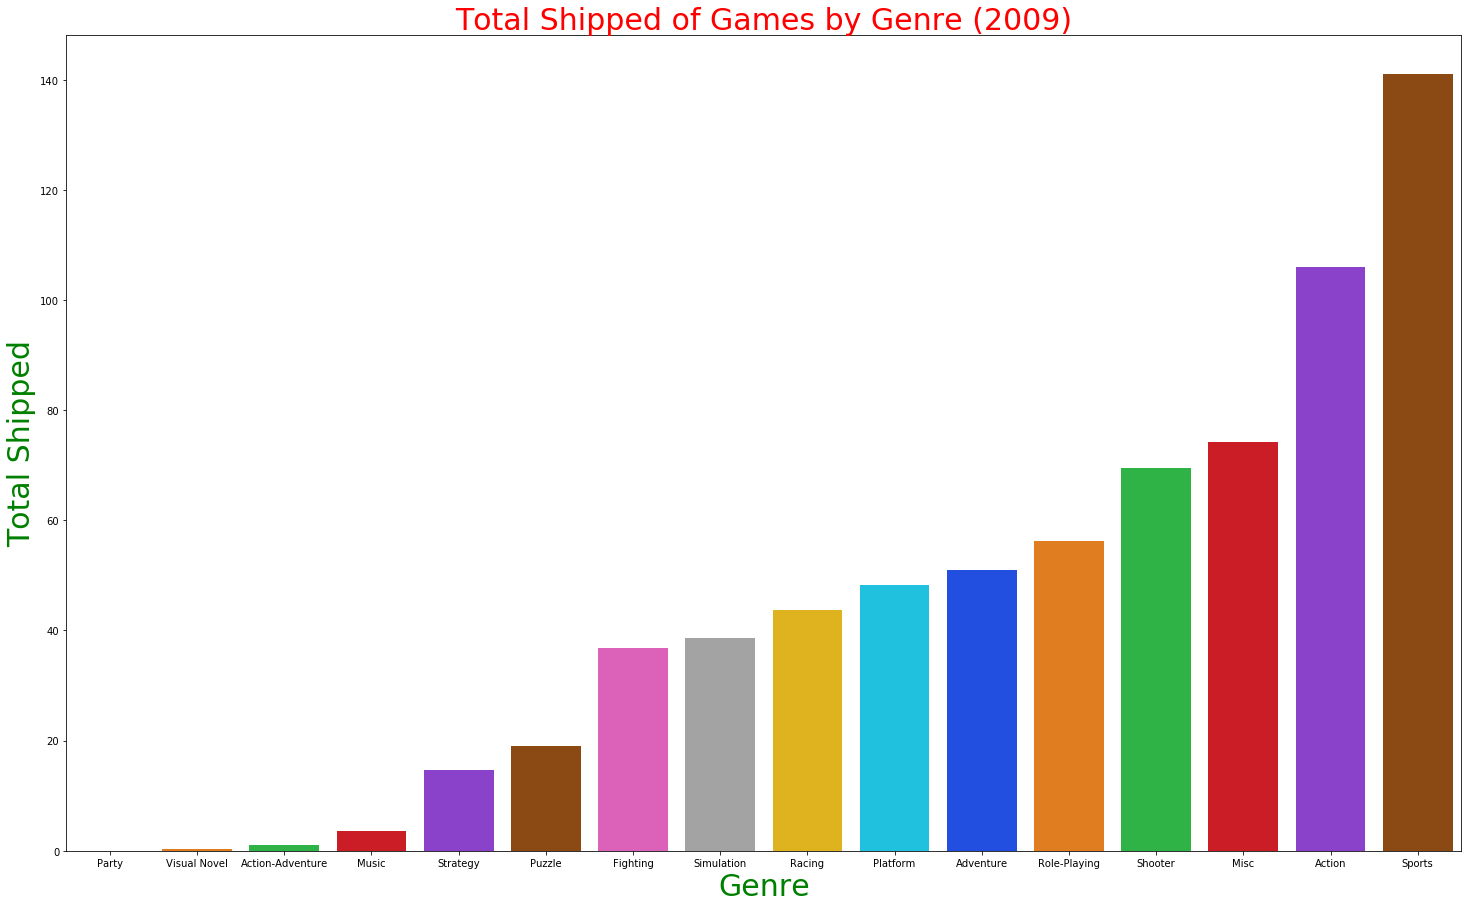

In [33]:
# Total sales based on Genre
global_sales_by_genre = games_2009.groupby('Genre').agg({'Total_Shipped':np.sum}).sort_values('Total_Shipped')
plt.subplots(figsize=(25,15))
ax = sns.barplot(x=global_sales_by_genre.index, y=global_sales_by_genre.Total_Shipped, palette='bright')
ax.set_title('Total Shipped of Games by Genre (2009)', color='red', size=30, alpha=1)
ax.set_xlabel('Genre', color='green', size=30, alpha=1)
ax.set_ylabel('Total Shipped', color='green', size=30, alpha=1)

Text(0, 0.5, 'Sales')

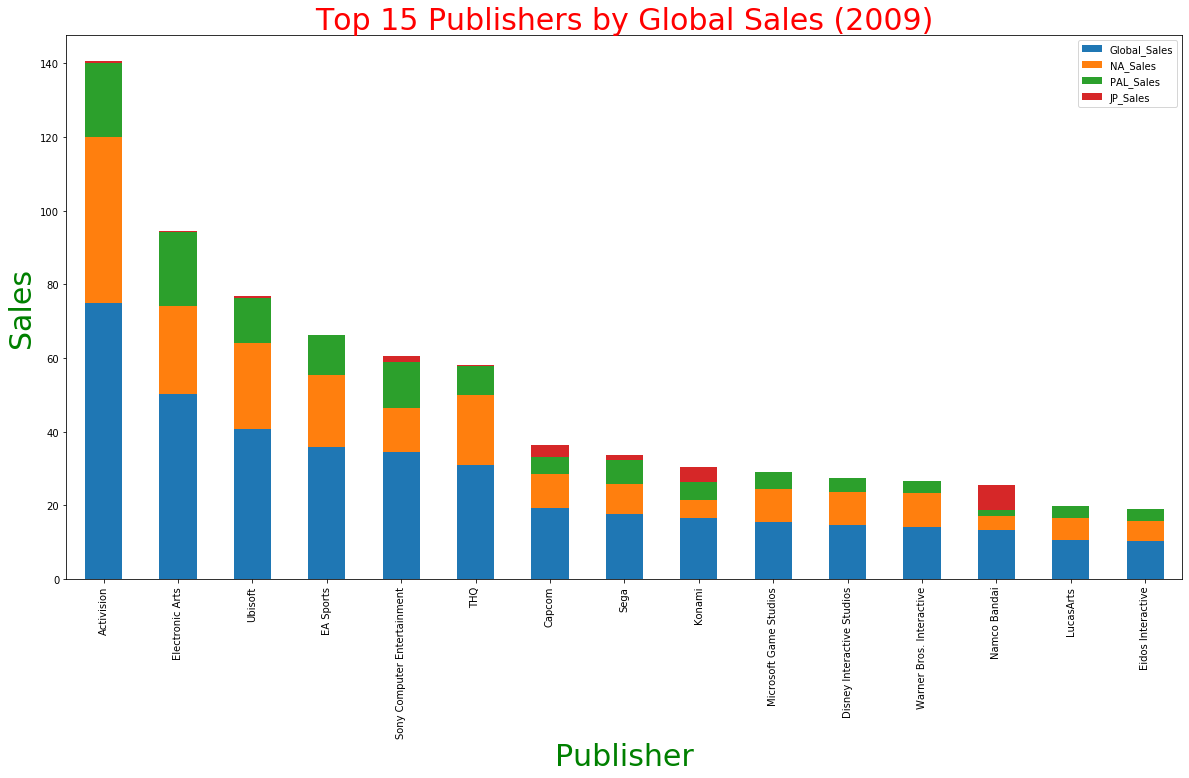

In [34]:
# Let's look at the global sales by publisher
global_sales_publisher = games_2009.pivot_table(index=['Publisher'], values=['Global_Sales','NA_Sales','PAL_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Global_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['Global_Sales','NA_Sales','PAL_Sales','JP_Sales']]
ax = global_sales_publisher.iloc[0:15,:].plot(kind='bar', stacked=True, grid=False,figsize=(20,10))
ax.set_title('Top 15 Publishers by Global Sales (2009)', size=30, color='red', alpha=1)
ax.set_xlabel('Publisher', size=30, color='green', alpha=1)
ax.set_ylabel('Sales', size=30, color='green', alpha=1)

In [35]:
global_sales_publisher

,Global_Sales,NA_Sales,PAL_Sales,JP_Sales
Publisher,,,,
Activision,74.97,45.10,20.07,0.46
Electronic Arts,50.23,23.78,20.09,0.28
Ubisoft,40.63,23.49,12.01,0.56
EA Sports,35.66,19.64,10.83,0.17
Sony Computer Entertainment,34.43,11.98,12.41,1.70
THQ,30.93,19.09,7.90,0.07
Capcom,19.13,9.29,4.75,3.12
Sega,17.72,7.96,6.65,1.24
Konami,16.40,4.95,4.84,4.09


Text(0, 0.5, 'Sales')

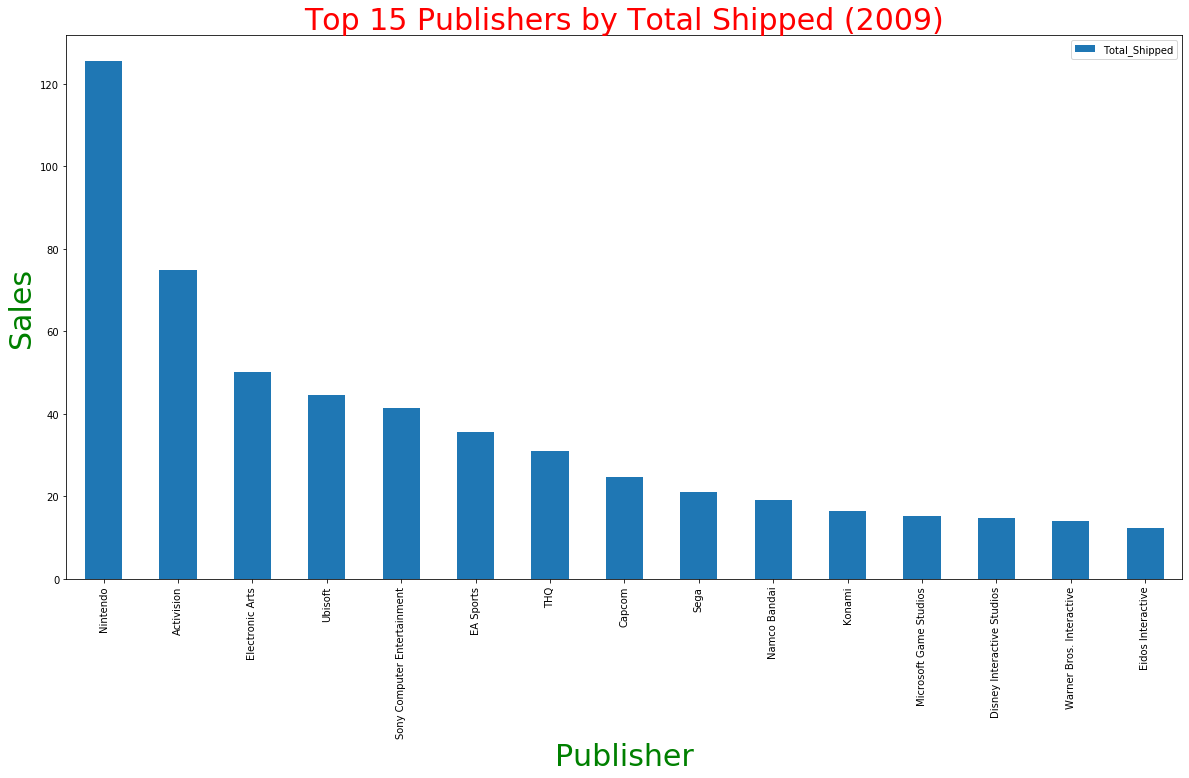

In [36]:
# Let's look at the global sales by publisher
Total_Shipped_publisher = games_2009.pivot_table(index=['Publisher'], values=['Total_Shipped'], 
                                           aggfunc=np.sum).sort_values(['Total_Shipped'], ascending=False)
Total_Shipped_publisher = Total_Shipped_publisher[['Total_Shipped']]
ax = Total_Shipped_publisher.iloc[0:15,:].plot(kind='bar', stacked=True, grid=False,figsize=(20,10))
ax.set_title('Top 15 Publishers by Total Shipped (2009)', size=30, color='Red', alpha=1)
ax.set_xlabel('Publisher', size=30, color='green', alpha=1)
ax.set_ylabel('Sales', size=30, color='green', alpha=1)

In [37]:
Total_Shipped_publisher

,Total_Shipped
Publisher,
Nintendo,125.54
Activision,74.97
Electronic Arts,50.23
Ubisoft,44.63
Sony Computer Entertainment,41.52
EA Sports,35.66
THQ,30.93
Capcom,24.80
Sega,21.13
